**Import important libereries**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

**Get data ready**

In [3]:
train_dataset=datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)

100%|██████████| 26.4M/26.4M [00:06<00:00, 4.36MB/s]


Extracting /dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 311kB/s]


Extracting /dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.55MB/s]


Extracting /dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.43MB/s]

Extracting /dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



In [4]:
test_dataset=datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor())

In [5]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
len(train_dataset)

60000

**converting data into batches**

In [8]:
batch_size=64

In [9]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [10]:
len(list(train_loader))

938

In [11]:
len(list(test_loader))

157

**Logistic Regression Model**

In [12]:
class LogisticRegression(nn.Module):
  def __init__(self,in_dim,n_class):
    super().__init__()
    self.linear=nn.Linear(in_dim,n_class)
  def forward(self,x):
    out=self.linear(x)
    return out

In [13]:
model=LogisticRegression(28 * 28 ,10)

In [14]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [15]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
device

'cpu'

In [17]:
model=model.to(device)

**cost function and optimizer**

In [19]:
learning_rate=1e-3

In [20]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

**Training Loop**

In [21]:
num_epochs=10

In [28]:
for epoch in range(num_epochs):
  print('*' * 10)
  print(f'epoch {epoch +1}')
  running_loss=0.0
  running_acc=0.0
  model.train()
  for i, data in enumerate(train_loader,1):
    img,label=data
    img=img.view(img.size(0),-1)
    img=img.to(device)
    label=label.to(device)
    out=model(img)
    loss=criterion(out,label)
    running_loss +=loss.item()
    _,pred =torch.max(out,1)
    running_acc +=(pred == label).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 300 == 0:
        print(f'[{epoch+1}/{num_epochs}] loss: {running_loss/i:.6f},acc: {running_acc/i:.6f}')
  print(f'Finish {epoch+1} epoch ,loss: {running_loss/i:.6f},acc: {running_acc/i:.6f}')

**********
epoch 1
[1/10] loss: 2.001634,acc: 0.436823
[1/10] loss: 1.823490,acc: 0.530990
[1/10] loss: 1.694308,acc: 0.572361
Finish 1 epoch ,loss: 1.680066,acc: 0.576059
**********
epoch 2
[2/10] loss: 1.277026,acc: 0.666667
[2/10] loss: 1.231616,acc: 0.671562
[2/10] loss: 1.195601,acc: 0.674201
Finish 2 epoch ,loss: 1.190762,acc: 0.675390
**********
epoch 3
[3/10] loss: 1.062781,acc: 0.684635
[3/10] loss: 1.036531,acc: 0.691484
[3/10] loss: 1.020652,acc: 0.695347
Finish 3 epoch ,loss: 1.017910,acc: 0.695962
**********
epoch 4
[4/10] loss: 0.945517,acc: 0.709375
[4/10] loss: 0.937404,acc: 0.711797
[4/10] loss: 0.928048,acc: 0.714514
Finish 4 epoch ,loss: 0.926490,acc: 0.715119
**********
epoch 5
[5/10] loss: 0.881768,acc: 0.727865
[5/10] loss: 0.875513,acc: 0.728255
[5/10] loss: 0.868044,acc: 0.730035
Finish 5 epoch ,loss: 0.867747,acc: 0.729744
**********
epoch 6
[6/10] loss: 0.839902,acc: 0.737969
[6/10] loss: 0.834751,acc: 0.739505
[6/10] loss: 0.826370,acc: 0.741701
Finish 6 epoc

**Evaluate the model**

In [32]:
model.eval()
eval_loss=0
eval_acc=0
for data in test_loader:
  img,label=data
  img=img.view(img.size(0),-1)
  img=img.to(device)
  label=label.to(device)
  with torch.no_grad():
    out=model(img)
    loss=criterion(out,label)
    eval_loss +=loss.item()
    _,pred=torch.max(out,1)
    eval_acc +=(pred == label).float().mean()
print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')


Test Loss: 0.737522, Acc: 0.758061


**Visulizing Model**

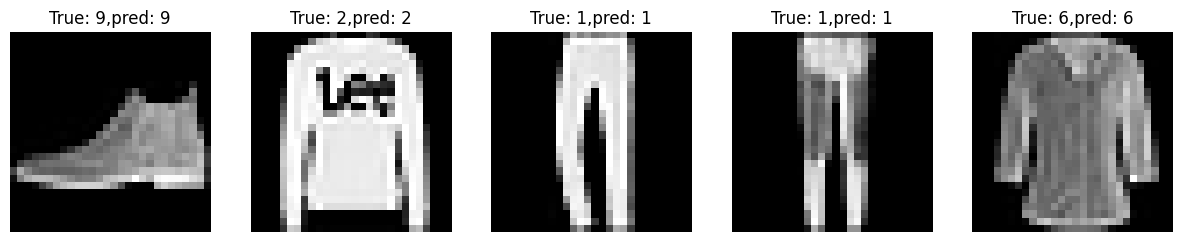

In [35]:
images,labels=next(iter(test_loader))
images=images.reshape(-1,28*28).to(device)
labels=labels.to(device)
outputs=model(images)
_,predicted=torch.max(outputs,1)
fig,ax =plt.subplots(1,5,figsize=(15,3))
for i in range(5):
  ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
  ax[i].set_title(f'True: {labels[i].item()},pred: {predicted[i].item()}')
  ax[i].axis('off')
plt.show()


**save model**

In [36]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0140,  0.0124, -0.0140,  ...,  0.0041, -0.0003, -0.0116],
                      [ 0.0103,  0.0282, -0.0067,  ...,  0.0208, -0.0281, -0.0236],
                      [-0.0264,  0.0277, -0.0091,  ...,  0.0327, -0.0123,  0.0172],
                      ...,
                      [ 0.0027,  0.0090,  0.0250,  ..., -0.0187,  0.0068,  0.0102],
                      [-0.0221, -0.0089,  0.0213,  ..., -0.0317, -0.0031, -0.0306],
                      [-0.0249,  0.0307,  0.0328,  ...,  0.0093,  0.0189,  0.0314]])),
             ('linear.bias',
              tensor([-0.0323,  0.0022, -0.0605, -0.0259, -0.1445,  0.2994,  0.0484, -0.0082,
                      -0.0869, -0.0887]))])

In [37]:
torch.save(model.state_dict(),'./LogisticRegression.pth')